# Genomic Analysis of CoVID-19 virus

Coronaviruses are a large family of viruses that can cause illnesses ranging widely in severity. The first known severe illness caused by a coronavirus appeared with the 
* 2003 Severe Acute Respiratory Syndrome (SARS) epidemic in China. A second outbreak of severe illness originated in 
* 2012 in Saudi Arabia with the Middle East Respiratory Syndrome (MERS). And now the ongoing 
* outbreak of COVID-19.

we will interpret, analyze the COVID-19 DNA sequence data and try to get as many insights regarding the proteins that made it up. Later will compare COVID-19 DNA with MERS and SARS and we’ll understand the relationship among them.

If you are new to genomics, get an introductory insight into it at:
https://medium.com/@jyothics/learning-basics-of-dna-and-dna-rna-analysis-with-covid-19-sequence-377dd4c3480




![](https://drive.google.com/uc?export=view&id=1C2mg9LMK_m421UMwQ8QwC45ZeQ0aKEa9)

     




![](https://drive.google.com/uc?export=view&id=1B1aLtCgUWLiJLaWAqp5BnKfBLP79SXkl)

The coronaviruses  are members of a family of enveloped viruses that replicate in the cytoplasm of animal host cells. They are identified by the presence of a single-stranded plus-sense RNA genome((+)ssRNA classification of viruses) about 30 kb in length that has a 5′ cap structure and 3′ polyadenylation tract.

Now let us play with the COVID2–19 DNA sequence data using python.

In [48]:
!pip install biopython

In [49]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta). It provides a simple uniform interface to input and output assorted sequence file formats.

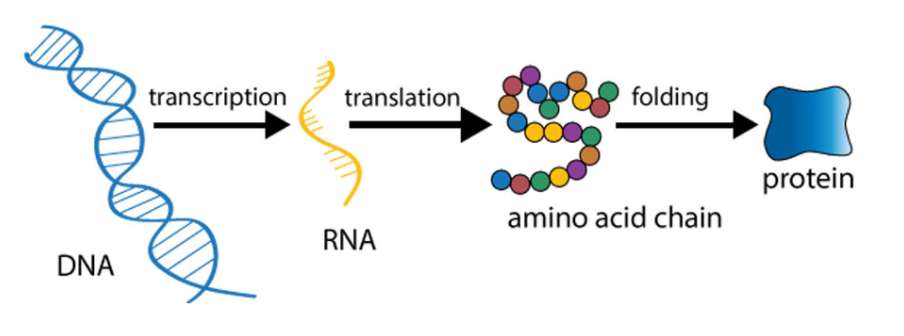

In [50]:
os.chdir("C:/Users/jyoth/Downloads/archive (4)")

In [51]:
from Bio import SeqIO 
for sequence in SeqIO.parse('MN908947.fna', "fasta"):
  print(sequence.seq)
  print(len(sequence),'nucliotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [52]:
#Loading Complementary DNA Sequence into an alignable file
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('MN908947.fna', "fasta")

In [53]:
DNAsequence

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

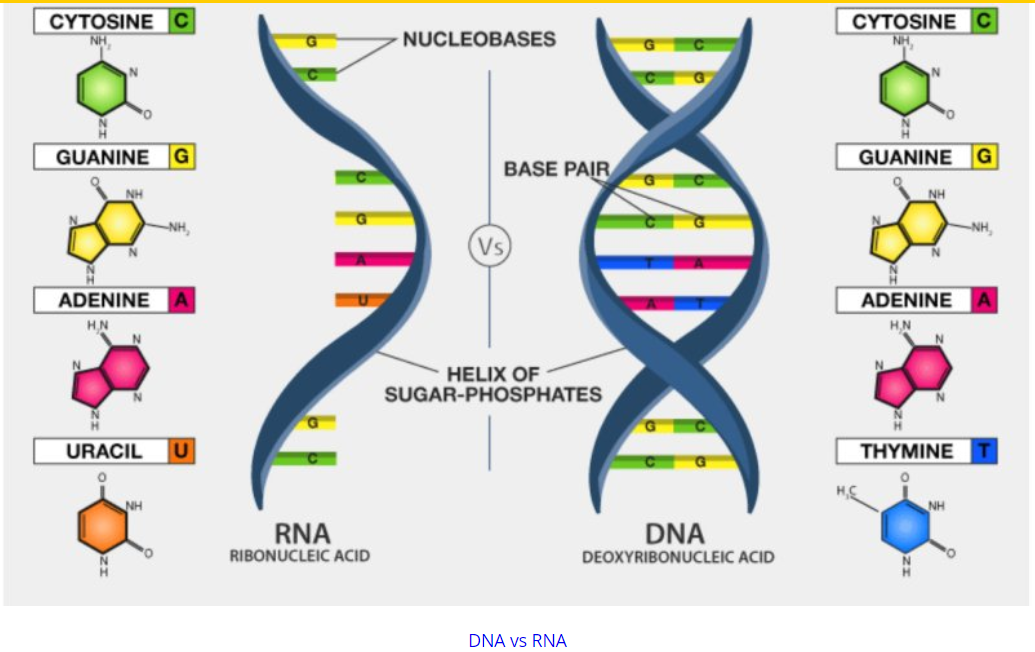

In [81]:
#Count the nucleotides frequency in the DNA
DNA= DNAsequence
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


# Transcription

In [54]:
DNA = DNAsequence.seq#Convert DNA into mRNA Sequence
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
print(mRNA)
print('Size : ',len(mRNA))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

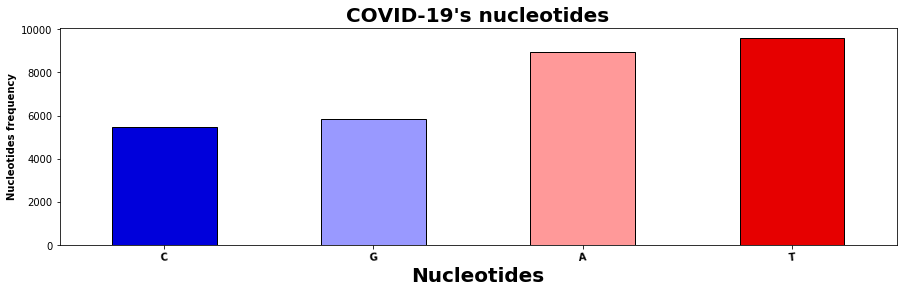

In [82]:
#plot the nucleotides frequency
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
a= nts['frequency'].plot.bar(color=sns.color_palette('seismic',4), edgecolor='black')
plt.xticks(rotation=5)
plt.ylabel("Nucleotides frequency", weight='bold')
r=[0,1,2,3]
plt.xticks(r, nts.nucleotides, weight='bold')
plt.xlabel("Nucleotides", weight='bold', size=20)
plt.title("COVID-19's nucleotides", weight='bold', size=20)
plt.show()

# Translation

In [55]:
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

C:\Users\jyoth\Anaconda3\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [91]:
import re
delimeter = '*'
splited_amino_acid = Amino_Acid.split()
print(splited_amino_acid)

[Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')]


In [92]:
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))

Total proteins: 775


In [93]:
print(df)

                                                     0
0                             (I, K, G, L, Y, L, P, R)
1              (Q, T, N, Q, L, S, I, S, C, R, S, V, L)
2           (T, N, F, K, I, C, V, A, V, T, R, L, H, A)
3                                      (C, T, H, A, V)
4                                (L, I, T, N, Y, C, R)
..                                                 ...
770      (S, H, I, A, I, F, N, Q, C, V, T, L, G, R, T)
771  (K, S, H, H, I, F, T, E, A, T, R, S, T, I, E, ...
772                                                (F)
773                                                 ()
774   (L, L, R, R, M, T, K, K, K, K, K, K, K, K, K, K)

[775 rows x 1 columns]


In [94]:
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()
# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


In [95]:
df

,sequence,sequence_str,length
0,"(I, K, G, L, Y, L, P, R)",IKGLYLPR,8
1,"(Q, T, N, Q, L, S, I, S, C, R, S, V, L)",QTNQLSISCRSVL,13
2,"(T, N, F, K, I, C, V, A, V, T, R, L, H, A)",TNFKICVAVTRLHA,14
3,"(C, T, H, A, V)",CTHAV,5
4,"(L, I, T, N, Y, C, R)",LITNYCR,7
...,...,...,...
770,"(S, H, I, A, I, F, N, Q, C, V, T, L, G, R, T)",SHIAIFNQCVTLGRT,15
771,"(K, S, H, H, I, F, T, E, A, T, R, S, T, I, E, ...",KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
772,(F),F,1
773,(),,0


In [96]:
print(df['length'].max())
print(df['length'].min())

2701
0


In [97]:
print(df['sequence_str'])

0                                         IKGLYLPR
1                                    QTNQLSISCRSVL
2                                   TNFKICVAVTRLHA
3                                            CTHAV
4                                          LITNYCR
                          ...                     
770                                SHIAIFNQCVTLGRT
771    KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM
772                                              F
773                                               
774                               LLRRMTKKKKKKKKKK
Name: sequence_str, Length: 775, dtype: object


In [84]:
print(f'Covid-19 DNA: {DNA[:50]}')
print(f'Covid-19 RNA: {mRNA[:50]}')

Covid-19 DNA: ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC')
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


In [90]:
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))
print("Length of Original DNA:",len(DNA))

Length of Protein: 9967
Length of Original mRNA: 29903
Length of Original DNA: 29903


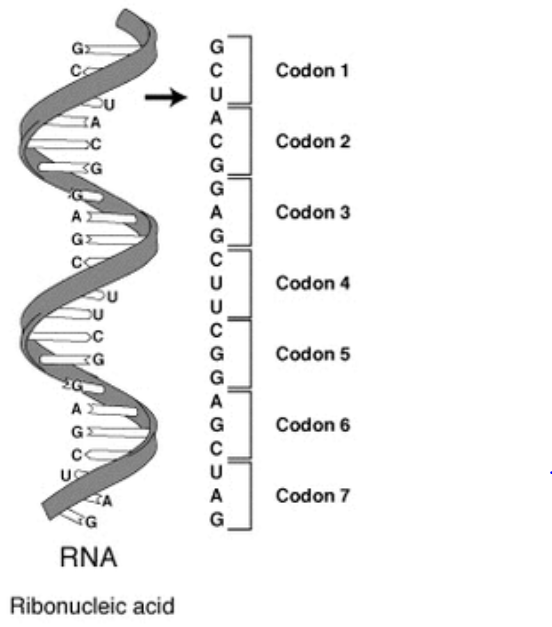

In [56]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

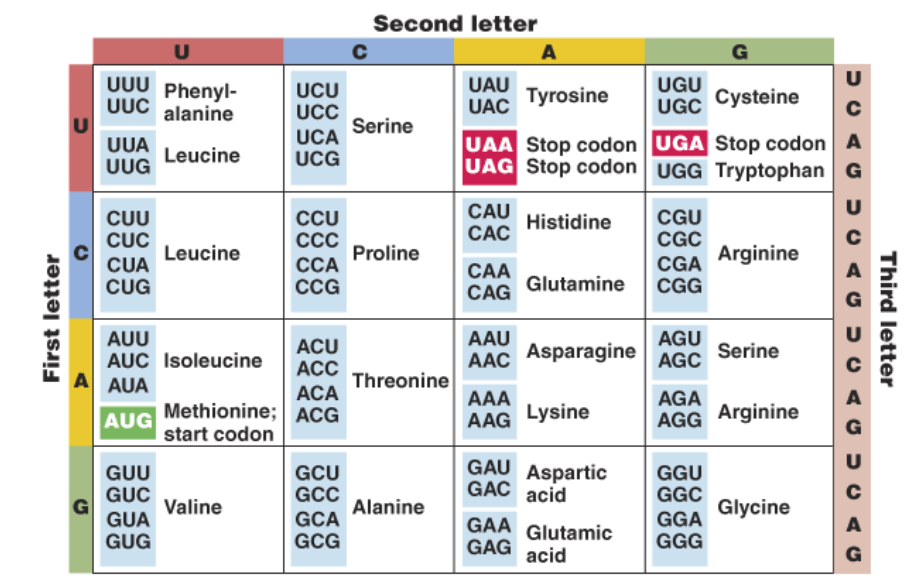

In [57]:
"""
Let's now identify all the polypeptides so basically separating at the stop codon, marked by * . Then let's remove any 
sequence less than 20 amino acids long, as this is the smallest known functional protein (if curious). 
Note: In humans the smallest known functional protien is 44 amino acids long.
"""
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)

In [58]:
# 1. Protein Analysis With The Protparam Module In Biopython
from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in Proteins[:]: 
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI) 
    print("Amino acids percent = ", str(X.get_amino_acids_percent())) 
    print("Molecular weight = ", MW)
    print("Aromaticity = ", X.aromaticity()) 
    print("Flexibility = ", X.flexibility()) 
    print("Isoelectric point = ", X.isoelectric_point()) 
    print("Secondary structure fraction = ", X.secondary_structure_fraction())



Protein of Interest =  {'A': 0, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 1, 'H': 0, 'I': 3, 'K': 0, 'L': 3, 'M': 0, 'N': 1, 'P': 2, 'Q': 2, 'R': 4, 'S': 7, 'T': 4, 'V': 3, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.02857142857142857, 'D': 0.02857142857142857, 'E': 0.02857142857142857, 'F': 0.05714285714285714, 'G': 0.02857142857142857, 'H': 0.0, 'I': 0.08571428571428572, 'K': 0.0, 'L': 0.08571428571428572, 'M': 0.0, 'N': 0.02857142857142857, 'P': 0.05714285714285714, 'Q': 0.05714285714285714, 'R': 0.11428571428571428, 'S': 0.2, 'T': 0.11428571428571428, 'V': 0.08571428571428572, 'W': 0.0, 'Y': 0.0}
Molecular weight =  3896.388
Aromaticity =  0.05714285714285714
Flexibility =  [1.0254166666666666, 1.0115238095238097, 0.9737499999999999, 0.9758214285714286, 0.9602857142857143, 0.9736428571428574, 0.9377261904761905, 0.9531309523809526, 0.9757857142857143, 0.9605952380952383, 0.9992738095238096, 0.9844642857142858, 0.9694166666666666, 0.9892738095238094, 1.004392857142857, 0.9

Flexibility =  [0.9545952380952382, 0.9443333333333335, 0.931, 0.9445714285714285, 0.9720833333333335, 0.9355119047619046, 0.9970119047619048, 0.9625238095238096, 1.0016666666666667, 1.0088809523809523, 1.007, 0.9957857142857145, 1.0495, 1.0262499999999999]
Isoelectric point =  8.511712455749514
Secondary structure fraction =  (0.30434782608695654, 0.2608695652173913, 0.08695652173913043)


Protein of Interest =  {'A': 0, 'C': 4, 'D': 0, 'E': 0, 'F': 2, 'G': 1, 'H': 1, 'I': 0, 'K': 0, 'L': 2, 'M': 0, 'N': 1, 'P': 0, 'Q': 1, 'R': 2, 'S': 1, 'T': 0, 'V': 2, 'W': 0, 'Y': 3}
Amino acids percent =  {'A': 0.0, 'C': 0.2, 'D': 0.0, 'E': 0.0, 'F': 0.1, 'G': 0.05, 'H': 0.05, 'I': 0.0, 'K': 0.0, 'L': 0.1, 'M': 0.0, 'N': 0.05, 'P': 0.0, 'Q': 0.05, 'R': 0.1, 'S': 0.05, 'T': 0.0, 'V': 0.1, 'W': 0.0, 'Y': 0.15}
Molecular weight =  2474.9024
Aromaticity =  0.25
Flexibility =  [0.9488809523809524, 0.9914285714285717, 0.9388333333333333, 0.9672500000000002, 0.9578452380952381, 0.9595, 0.9902142857142857

Flexibility =  [1.020952380952381, 1.007238095238095, 0.9770357142857142, 0.9972142857142856, 0.9651309523809524, 0.9786428571428571, 0.9705119047619047, 1.000857142857143, 1.0011428571428571, 0.965892857142857, 0.9938571428571428, 1.0080238095238097, 0.9587738095238096, 0.9660000000000001, 0.9651904761904762, 0.9693333333333333, 0.9412261904761904, 0.9510357142857143, 0.9743214285714284, 0.9514880952380954, 0.9881666666666666, 0.9651904761904762, 0.9670714285714285, 0.9984880952380951, 0.9823333333333336, 1.0392261904761906, 1.0045119047619049, 1.0251785714285713, 1.047809523809524, 1.0064523809523809, 1.0680119047619048, 1.027892857142857, 1.0167976190476191, 1.0329285714285714, 1.034654761904762, 1.0217619047619049, 1.0171190476190475, 0.9742857142857143, 0.9955952380952382, 1.000952380952381, 0.9797023809523809, 0.9825119047619046, 0.9790476190476189, 0.9858928571428571, 0.9725238095238096, 1.0071666666666668, 0.9669285714285716, 1.0094880952380951, 0.9851785714285713, 1.0058214285

Flexibility =  [1.0257738095238096, 1.0074404761904763, 0.9746666666666667, 1.0181785714285714, 1.010535714285714, 0.9929523809523809, 1.0433452380952382, 0.9963452380952381, 1.0326666666666666, 1.009738095238095, 0.9927261904761906, 1.0006666666666668, 1.028, 0.9763571428571428, 0.970107142857143, 0.9975595238095238, 0.9599166666666666, 1.0016309523809526]
Isoelectric point =  9.62514591217041
Secondary structure fraction =  (0.3333333333333333, 0.2962962962962963, 0.14814814814814814)


Protein of Interest =  {'A': 4, 'C': 3, 'D': 0, 'E': 3, 'F': 2, 'G': 1, 'H': 2, 'I': 4, 'K': 2, 'L': 2, 'M': 2, 'N': 3, 'P': 1, 'Q': 0, 'R': 3, 'S': 5, 'T': 4, 'V': 1, 'W': 0, 'Y': 1}
Amino acids percent =  {'A': 0.09302325581395349, 'C': 0.06976744186046512, 'D': 0.0, 'E': 0.06976744186046512, 'F': 0.046511627906976744, 'G': 0.023255813953488372, 'H': 0.046511627906976744, 'I': 0.09302325581395349, 'K': 0.046511627906976744, 'L': 0.046511627906976744, 'M': 0.046511627906976744, 'N': 0.069767441860465

<BarContainer object of 20 artists>

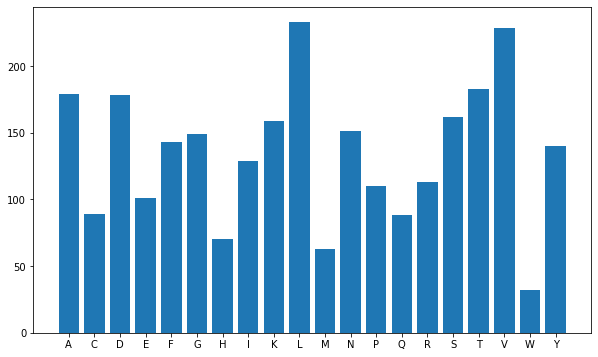

In [101]:
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] )
#plot POI
poi_list = poi_list
                    
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

In [105]:
from __future__ import division
poi_list = []
MW_list = []

from Bio.SeqUtils import ProtParam
for record in Proteins[:]:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI)
    print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
    print("Molecular weight = ", MW_list)
    print("Aromaticity = ", X.aromaticity())
    print("Flexibility = ", X.flexibility())
    print("Isoelectric point = ", X.isoelectric_point())
    print("Secondary structure fraction = ",   X.secondary_structure_fraction())



Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
Amino acids percent =     {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.125, 'H': 0.0, 'I': 0.125, 'K': 0.125, 'L': 0.25, 'M': 0.0, 'N': 0.0, 'P': 0.125, 'Q': 0.0, 'R': 0.125, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.125}
Molecular weight =  [959.1858]
Aromaticity =  0.125
Flexibility =  []
Isoelectric point =  9.994291877746583
Secondary structure fraction =  (0.5, 0.25, 0.25)


Protein of Interest =  {'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 2, 'M': 0, 'N': 1, 'P': 0, 'Q': 2, 'R': 1, 'S': 3, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
Amino acids percent =     {'A': 0.0, 'C': 0.07692307692307693, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.07692307692307693, 'K': 0.0, 'L': 0.15384615384615385, 'M': 0.0, 'N': 0.07692307692307693, 'P': 0.0, 'Q': 0.1

ZeroDivisionError: float division by zero

In [59]:
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] )
MoW.head()

,Molecular Weights
0,3896.3880
1,5313.9091
2,2268.5276
3,2240.4102
4,2856.2400


<BarContainer object of 20 artists>

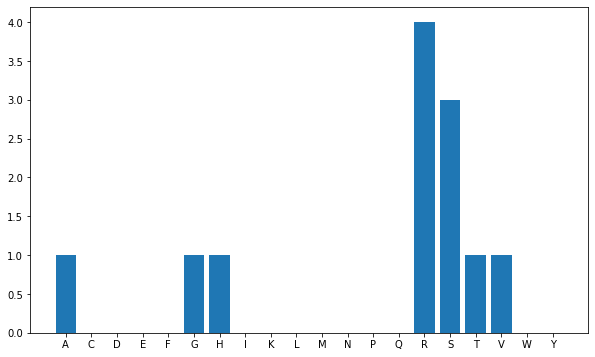

In [106]:
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] )
#plot POI
poi_list = poi_list[10]
                    
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

In [60]:
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
    
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total proteins: 775
Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


<BarContainer object of 20 artists>

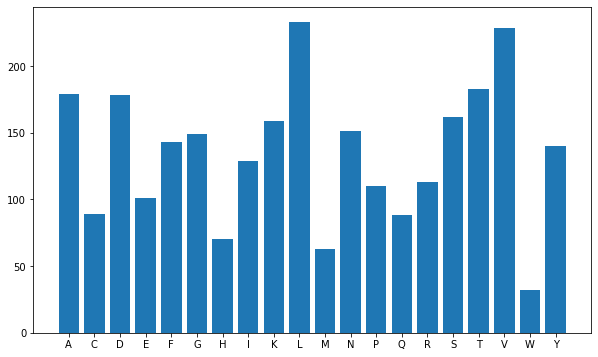

In [61]:
#plot POI
poi_list = poi_list[48]
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

Text(0.5, 1.0, 'Length of proteins -- histogram')

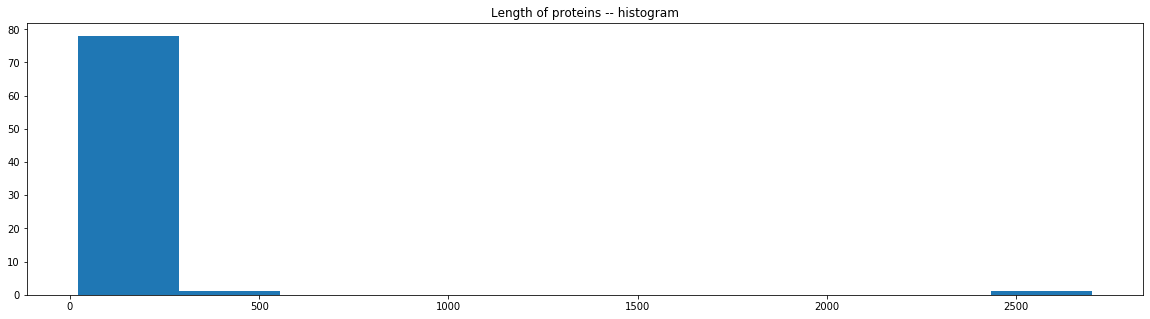

In [62]:
# Plot lengths
plt.figure(figsize=(20,5))
plt.subplot(111)
plt.hist(functional_proteins['length'])
plt.title('Length of proteins -- histogram')

Text(0.5, 1.0, 'Lenght of proteins (where < 60)')

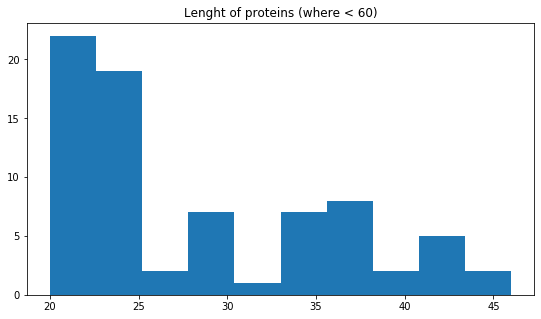

In [63]:
# Remove the extremes
plt.figure(figsize=(20,5))
wo = functional_proteins.loc[functional_proteins['length'] < 60]
plt.subplot(121)
plt.hist(wo['length'])
plt.title('Lenght of proteins (where < 60)')

Text(0.5, 1.0, 'Length of proteins (where > 1000)')

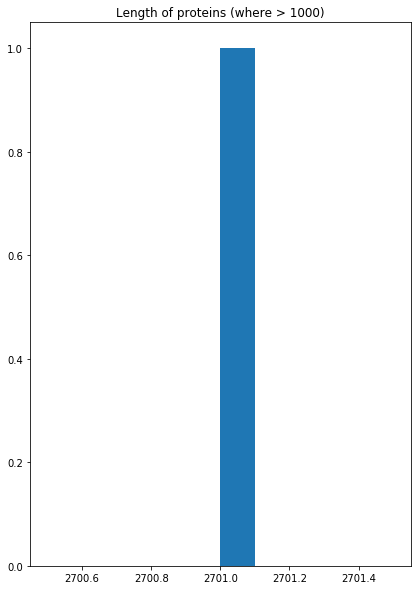

In [64]:
plt.figure(figsize=(15,10))
wo = functional_proteins.loc[functional_proteins['length'] > 1000]
plt.subplot(122)
plt.hist(wo['length'])
plt.title('Length of proteins (where > 1000)')

In [65]:
# See what's about that huge protein
large_prot = functional_proteins.loc[functional_proteins['length'] > 2700]
l = large_prot['sequence'].tolist()[0]
print('Sequence sample:', '...',l[1000:1150],'...')

Sequence sample: ... CKSHKPPISFPLCANGQVFGLYKNTCVGSDNVTDFNAIATCDWTNAGDYILANTCTERLKLFAAETLKATEETFKLSYGIATVREVLSDRELHLSWEVGKPRPPLNRNYVFTGYRVTKNSKVQIGEYTFEKGDYGDAVVYRGTTTYKLNV ...


# Comparative Gernomics

In [66]:
#2. Comparing Human Coronavirus RNA

from Bio import pairwise2
# Define sequences to be aligned
SARS = SeqIO.read("sars.fasta", "fasta")
MERS = SeqIO.read("mers.fasta", "fasta")
COV2 = SeqIO.read("cov2.fasta", "fasta")

print('Sequence Lengths:')
print('SARS:', len(SARS.seq))
print('COV2:', len(COV2.seq))
print('MERS:', len(MERS.seq))

Sequence Lengths:
SARS: 29681
COV2: 29833
MERS: 30049


In [69]:
# Alignments using pairwise2 alghoritm
SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('SARS/COV Similarity (%):', SARS_COV / len(SARS.seq) * 100)
MERS_COV = pairwise2.align.globalxx(MERS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('MERS/COV Similarity (%):', MERS_COV / len(MERS.seq) * 100)
MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only=True, score_only=True)
print('MERS/SARS Similarity (%):', MERS_SARS / len(SARS.seq) * 100)

SARS/COV Similarity (%): 83.31929517199555
MERS/COV Similarity (%): 69.38334054377849
MERS/SARS Similarity (%): 69.93699673191604


<BarContainer object of 3 artists>

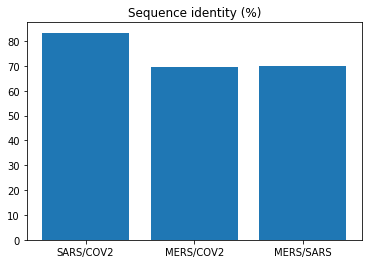

In [70]:
# Plot the data
X = ['SARS/COV2', 'MERS/COV2', 'MERS/SARS']
Y = [SARS_COV/ len(SARS.seq) * 100, MERS_COV/ len(MERS.seq)*100, MERS_SARS/len(SARS.seq)*100]
plt.title('Sequence identity (%)')
plt.bar(X,Y)

1- We started our analysis with the whole Covid-19 genome, that has 29903 nucleotides.The frequency of the nucleotides A and T is higher than the frequency of C and G.

2- Transcribed the DNA or copied it out to an mRNA.

3- The mRNA was translated to 9967 amino acids.

4- The amino acid sequences were split at the stop codons.

5- We ended up with 775 amino acid chains.

6- Total functional proteins: 80 and one protein > 2700 aa

7- the number of Lysines and Valines in this protein are high which indicates a good number of Alpha-Helices! Pharmacuetical companies should be excited

8-Two features aromaticity (ring-ness) and isoelectric point (gives good insight into the pH ranges where protein is functional, potential pharma target)

9- Comparative genomics between COVID-19, MERS  and SARS shows COVID-19 resembles SARS

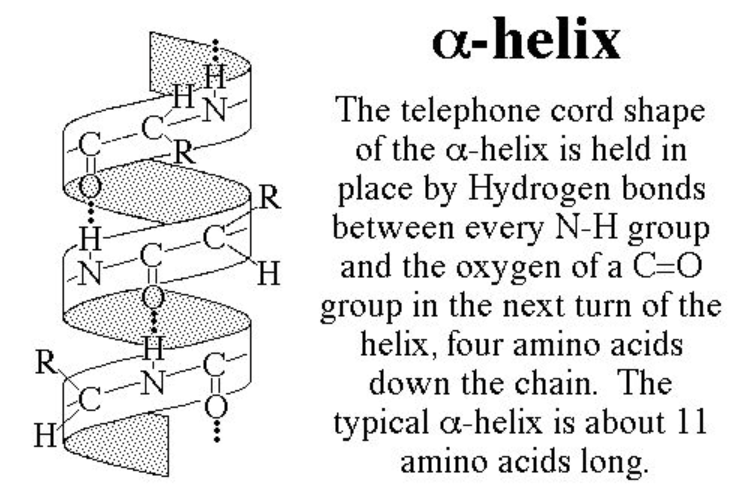

# References:

1. https://www.kaggle.com/kumarranjankamila/coronavirus-genome-analysis
2. https://www.kaggle.com/amiiiney/covid-19-proteins-identification-with-biopython
3. https://www.kaggle.com/abishpius/covid-19-genome-proteins-analysis-with-biopython
4. https://www.kaggle.com/paultimothymooney/coronavirus-genome-sequence/notebooks
5. https://www.nature.com/articles/s41586-020-2008-3
6. https://www.kdnuggets.com/2020/04/coronavirus-covid-19-genome-analysis-biopython.html

